In [3]:
#importing libraries
#!/usr/bin/env python2
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
from lifetimes import plotting
from lifetimes import utils
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np


In [ ]:
#getting connected with the data
import os
import pymysql
import pandas as pd

host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host='15.207.8.100',
    port=int(3306),
    user="datainsights",
    passwd='Data$9751',
    db="cadb",
    charset='utf8mb4')


In [ ]:
print(conn)

In [ ]:
'''
q_trans_wise = "select RP_OID, USER_OID, AMOUNT,TXN_COUNT,FROM_DATE,END_DATE,CATEGORY,
BRAND_OID,COUNTRY_OID,STORE_ID,TXN_OID,TXN_DATE
from rp_transactionwise_value LIMIT 1000"
q1 = "select * from cadb.rp_brandwise_ltv where CATEGORY='YEARLY BRANDWISE'"
q2 = "select * from cadb.rp_brandwise_ltv where CATEGORY='CUMULATIVE BRANDWISE'"
q3 = "select * from cadb.rp_brandwise_ltv where CATEGORY='OVERALL BRANDWISE'"
q = "select * from cadb.rp_brandwise_ltv"

cur = conn.cursor()
data = cur.execute(q_trans_wise)
trans_wise_df = pd.DataFrame(cur.fetchall())
'''

In [4]:
brand_wise = pd.read_csv('brand_wise_2018.csv', engine= "python")

In [5]:
brand_wise

,USER_OID,Amount,discount,txncount,CATEGORY,BRAND_OID
0,12,2361.0,0.0,5,YEARLY BRANDWISE,31
1,12,3824.0,0.0,15,YEARLY BRANDWISE,128
2,12,1177.0,0.0,3,YEARLY BRANDWISE,725
3,12,747.0,0.0,3,YEARLY BRANDWISE,1805
4,12,1203.0,0.0,6,YEARLY BRANDWISE,3018
...,...,...,...,...,...,...
17995,183316,1157.0,289.0,1,YEARLY BRANDWISE,128
17996,183316,378.0,50.0,1,YEARLY BRANDWISE,378
17997,183355,251.5,0.0,2,YEARLY BRANDWISE,5891
17998,183355,299.0,0.0,1,YEARLY BRANDWISE,10535


# CLTV BRAND WISE

In [5]:
brand_wise.describe()

,USER_OID,Amount,discount,txncount,BRAND_OID
count,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04
mean,125128.359778,535.246151,39.229362,1.437722,1.328524e+05
std,35410.036484,716.071532,143.031061,0.962263,1.640158e+06
min,12.000000,0.000000,0.000000,1.000000,3.100000e+01
25%,98102.000000,199.000000,0.000000,1.000000,7.250000e+02
50%,123172.000000,349.000000,0.000000,1.000000,3.018000e+03
75%,155891.750000,636.000000,0.000000,2.000000,1.045000e+04
max,183357.000000,36246.560000,9111.000000,22.000000,2.317791e+07


In [6]:
na_values = pd.isna(brand_wise) # Boolean DataFrame
na_features = na_values.any() # Boolean Series
print(na_features)

USER_OID     False
Amount       False
discount     False
txncount     False
CATEGORY     False
BRAND_OID    False
dtype: bool


In [6]:
tmp = brand_wise


In [7]:
# summing up the columns amount, txncount, discount

g = tmp.groupby(['BRAND_OID','USER_OID'])#['Amount','txncount','discount']
v2 = g.agg(lambda x: x.sum())
v3 = g.agg(lambda x: x.sum())
v4 = g.agg(lambda x: x.sum())

df = pd.concat([v2, v3, v4])
'''
tmp = tmp.groupby(['BRAND_OID', 'USER_OID'])['Amount','txncount','discount'].agg(
    [( lambda value: value.sum()), 
    (lambda value: value.sum()), 
    (lambda value: value.sum())],1)'''

"\ntmp = tmp.groupby(['BRAND_OID', 'USER_OID'])['Amount','txncount','discount'].agg(\n    [( lambda value: value.sum()), \n    (lambda value: value.sum()), \n    (lambda value: value.sum())],1)"

In [8]:
df 

Amount  discount  txncount          CATEGORY
BRAND_OID USER_OID                                              
31        12        2361.0       0.0         5  YEARLY BRANDWISE
          248        499.0       0.0         1  YEARLY BRANDWISE
          3519       289.0       0.0         1  YEARLY BRANDWISE
          3855       798.0       0.0         2  YEARLY BRANDWISE
          4080      1177.0       0.0         2  YEARLY BRANDWISE
...                    ...       ...       ...               ...
23177911  168350     375.0       0.0         1  YEARLY BRANDWISE
          173226      45.0       0.0         1  YEARLY BRANDWISE
          175938     427.5       0.0         4  YEARLY BRANDWISE
          179123     173.0       0.0         1  YEARLY BRANDWISE
          180810      15.0       0.0         1  YEARLY BRANDWISE

[54000 rows x 4 columns]

In [9]:
df.rename(columns = {'Amount':'CLV'}, inplace = True)

In [11]:
df

CLV  discount  txncount          CATEGORY
BRAND_OID USER_OID                                              
31        12        2361.0       0.0         5  YEARLY BRANDWISE
          248        499.0       0.0         1  YEARLY BRANDWISE
          3519       289.0       0.0         1  YEARLY BRANDWISE
          3855       798.0       0.0         2  YEARLY BRANDWISE
          4080      1177.0       0.0         2  YEARLY BRANDWISE
...                    ...       ...       ...               ...
23177911  168350     375.0       0.0         1  YEARLY BRANDWISE
          173226      45.0       0.0         1  YEARLY BRANDWISE
          175938     427.5       0.0         4  YEARLY BRANDWISE
          179123     173.0       0.0         1  YEARLY BRANDWISE
          180810      15.0       0.0         1  YEARLY BRANDWISE

[54000 rows x 4 columns]

In [12]:
df.describe()

,CLV,discount,txncount
count,54000.000000,54000.000000,54000.000000
mean,535.246151,39.229362,1.437722
std,716.058271,143.028412,0.962246
min,0.000000,0.000000,1.000000
25%,199.000000,0.000000,1.000000
50%,349.000000,0.000000,1.000000
75%,636.000000,0.000000,2.000000
max,36246.560000,9111.000000,22.000000


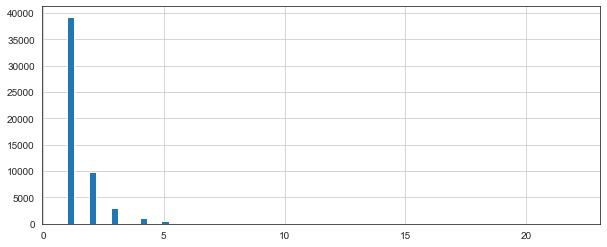

In [13]:
import matplotlib as plt
import seaborn as sns
sns.set_style('white')

from matplotlib import figure
import pylab as py
py.figure(figsize=(10,4))
df['txncount'].hist(bins=70)


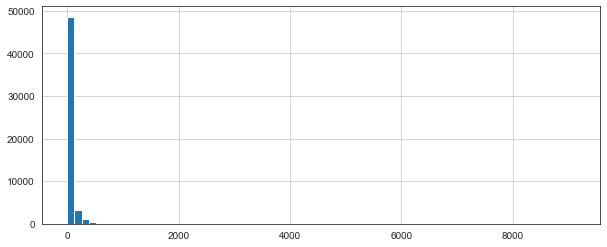

In [14]:
from matplotlib import figure
import pylab as py
py.figure(figsize=(10,4))
df['discount'].hist(bins=70)


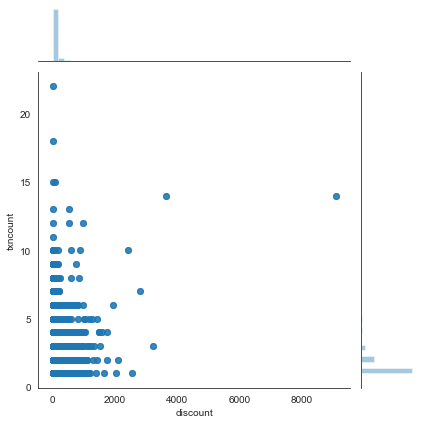

In [15]:
sns.jointplot(x='discount', y='txncount', data=df, alpha=0.5)

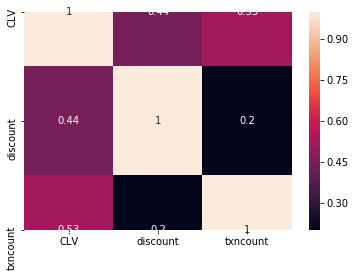

In [10]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)



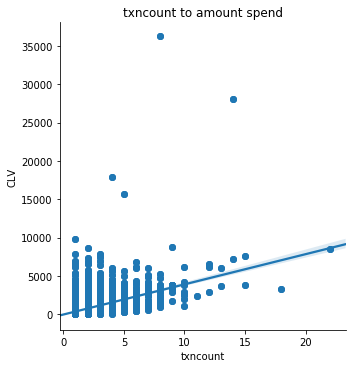

In [12]:
sns.lmplot('txncount', 'CLV', data=df);
plt.title('txncount to amount spend');

### Splitting the dataset into Training and Test set

In [35]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X = df[['txncount','discount']].astype(int)
y = df['CLV'].values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
X_train

,,txncount,discount
BRAND_OID,USER_OID,,
10535,179294,1,0
10532,121927,8,89
15115,10045,2,0
5897,147784,1,0
128,105813,1,0
...,...,...,...
1805,101642,1,0
3018,138989,1,0
10538,173107,1,0


In [37]:
y_train

array([ 520, 2878,  424, ...,  140,   79,  322])

In [38]:
## normalization using sklearn

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [39]:
X_train_norm

array([[0.        , 0.        ],
       [0.33333333, 0.00976841],
       [0.04761905, 0.        ],
       ...,
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ]])

In [40]:
### standardization using sklearn

# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['txncount','discount']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [41]:
X_train_stand

,,txncount,discount
BRAND_OID,USER_OID,,
10535,179294,-0.449124,-0.265455
10532,121927,6.745782,0.339566
15115,10045,0.578720,-0.265455
5897,147784,-0.449124,-0.265455
128,105813,-0.449124,-0.265455
...,...,...,...
1805,101642,-0.449124,-0.265455
3018,138989,-0.449124,-0.265455
10538,173107,-0.449124,-0.265455


In [ ]:
###K-Nearest Neighbours

###Like we saw before, KNN is a distance-based algorithm that is affected by the range of features.
##Let’s see how it performs on our data, before and after scaling:
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 
knn = KNeighborsRegressor(n_neighbors=7)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

In [ ]:
##Support Vector Regressor

##SVR is another distance-based algorithm. So let’s check out whether it works better with normalization or standardization:
# training an SVR model
from  sklearn.svm import SVR
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# SVR
svr = SVR(kernel='rbf',C=5)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    fitted_data = svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_svr

In [ ]:
###Decision Tree

##We already know that a Decision tree is invariant to feature scaling.
##But I wanted to show a practical example of how it performs on the data:
# training a Decision Tree model
from sklearn.tree import DecisionTreeRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# Decision tree
dt = DecisionTreeRegressor(max_depth=10,random_state=27)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_dt

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data 
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [ ]:
linreg.score(X_test, y_test)

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

print('MSE',metrics.mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [43]:
# k nearest neighbors


#Train the model and make predictions

from sklearn.neighbors import KNeighborsClassifier
##for n_neighbor = 1

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train_stand, y_train)

predictions = model.predict(X_test_stand)

#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train_stand, y_train)

    new_predictions = new_model.predict(X_test_stand)

    error_rates.append(np.mean(new_predictions != y_test))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00        12
          20       0.00      0.00      0.00        10
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00        10
          25       0.00      0.00      0.00        12
          26       0.00      0.00      0.00         6
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        44
          30       0.00    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(16,12))

plt.plot(error_rates)

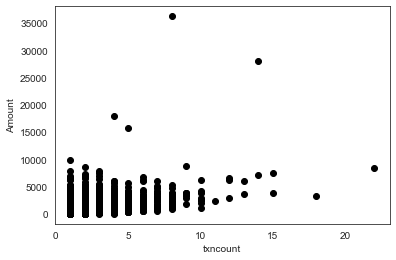

In [47]:
## k means clustering
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#brand_wise is the dataset


X = brand_wise[["txncount","discount","Amount"]]
#Visualise data points
plt.scatter(X["txncount"],X["Amount"],c='black')
plt.xlabel('txncount')
plt.ylabel('Amount')
plt.show()

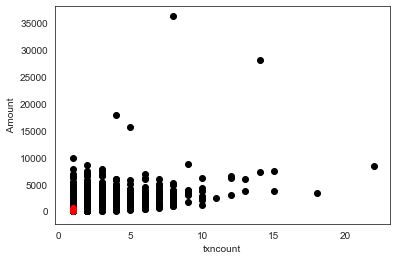

In [46]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["txncount"],X["Amount"],c='black')
plt.scatter(Centroids["txncount"],Centroids["Amount"],c='red')
plt.xlabel('txncount')
plt.ylabel(' Amount') 
plt.show()

In [48]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Amount"]-row_d["Amount"])**2
            d2=(row_c["txncount"]-row_d["txncount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["txncount","Amount"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['txncount'] - Centroids['txncount']).sum() + (Centroids_new['Amount'] - Centroids['Amount']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["txncount","Amount"]]

394.92035534259935
397.466474328856
371.3085048459805
360.6953289476643
338.5237784402088
305.4150093007145
316.1872845344877
306.98352497029936
282.0889702008778
256.68128312593547
247.84096215262767
214.27461277357298
209.28239489664887
186.22685672134423
200.29892396273868
253.33372487026307
227.94402813410258
226.7397208615375
215.3170483301534
194.29925000257677
166.79799662539207
141.78324019428422
100.5016203938006
23.657144214991845
4.310294438865151
1.0170485298788576
0.7614801821583561
0.0


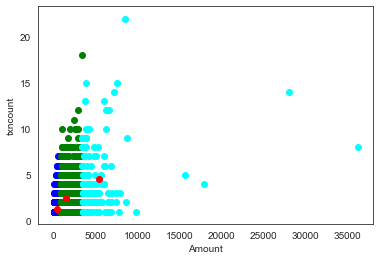

In [50]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Amount"],data["txncount"],c=color[k])
plt.scatter(Centroids["Amount"],Centroids["txncount"],c='red')
plt.ylabel('txncount')
plt.xlabel('Amount')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
sum_of_dist ={}
for k in range(1,15):
   km = KMeans(n_clusters=k, init='k-means', max_iter=1000)
   km = km.fit(X_train_stand)
   sum_of_dist[k] = km.inertia_

sns.pointplot(x=list(sum_of_dist.keys()),y=list(sum_of_dist.values()))
plt.xlabel('no of clusters')
plt.ylabel('sum of distance')
plt.title('elbow method')
plt.show()

In [ ]:
country_wise = pd.read_csv('country_wise.csv')

In [ ]:
country_wise

In [ ]:
store_wise = pd.read_csv('store_wise.csv')

In [ ]:
store_wise

In [ ]:
user_wise = pd.read_csv('user_wise.csv')

In [ ]:
user_wise

In [ ]:
rp_order_details_brand_wise = pd.read_csv('rp_order_details_brand_wise.csv')

In [ ]:
rp_order_details_brand_wise